In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import preprocessor as p
import geopandas as gp
from collections import Counter
from textblob import TextBlob
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.patches as mpatches

OUTPUT = Path.cwd().parents[0] / "Output"
de = np.array(Image.open(OUTPUT/  "Mask for Wclouds" / "en.png"))
df = pd.read_csv(Path.cwd().parents[0]  / "CSV" / "Raw"/ "all_tweets.csv")

def clean_emoji(x):
    if x == '{}':
        return None
    else:
        return x[1:-1]

df['emoji'] = df['emoji'].apply(clean_emoji)
df['hashtags'] = df['hashtags'].apply(lambda x:x[1:-1])
df['post_publish_date'] = pd.to_datetime(df['post_publish_date']) 
df['Month/Year'] = df['post_publish_date'].dt.to_period('M')
df['Year'] = df['post_publish_date'].dt.year
df.drop(columns = ['post_guid'],inplace = True)



/home/sagnik/miniconda3/envs/workshop_env/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
df_en = df[df['post_language']=='en']
df_en

p.set_options(p.OPT.URL, p.OPT.EMOJI,p.OPT.SMILEY,p.OPT.MENTION)

df_en['post_body'] = df_en['post_body'].apply(p.clean)
df_en['post_body'] = df_en['post_body'].apply(lambda x : x.replace('#',""))

def blobber(x):
    blob = TextBlob(x)
    return blob.sentiment.polarity,blob.sentiment.subjectivity

df_en[['polarity','subjectivity']] = df_en['post_body'].apply(blobber).apply(pd.Series)
df_en


<ipython-input-2-4f18c6c719c1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en['post_body'] = df_en['post_body'].apply(p.clean)
<ipython-input-2-4f18c6c719c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en['post_body'] = df_en['post_body'].apply(lambda x : x.replace('#',""))
/home/sagnik/miniconda3/envs/workshop_env/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,long,lat,post_body,post_publish_date,post_language,hashtags,emoji,Month/Year,Year,polarity,subjectivity
4,-2.115866,53.073712,""".: '""We can still have EU workers - but we''r...",2017-01-18 12:17:35,en,"Brexit,PMQs,immigration",None,2017-01,2017,0.000,0.000000
7,14.380054,35.934249,Throwing more money will not solve migration c...,2017-01-18 12:19:19,en,"EU2017MT,migration",None,2017-01,2017,0.500,0.500000
8,9.818380,46.764999,Syrian refugee speaking at a wef17 event 'The ...,2017-01-18 12:27:15,en,"wef17,TeamRefugees",None,2017-01,2017,0.000,0.000000
9,20.834226,39.655955,Refugee kids from the accommodation site of Vo...,2017-01-18 12:34:27,en,Refugee,None,2017-01,2017,0.125,0.166667
10,4.577031,52.294800,I'm afraid volunteers in Tunisia find bodies o...,2017-01-18 13:07:08,en,"Tunisia,migrants,refugees",None,2017-01,2017,-0.600,0.900000
...,...,...,...,...,...,...,...,...,...,...,...
168248,4.476774,50.501174,""". '""We want to get rid of this idea that ther...",2017-01-18 11:05:00,en,"terrorism,Juncker,migration",None,2017-01,2017,-0.200,0.900000
168249,14.380054,35.934249,Malts should not be allowed to deal with migra...,2017-01-18 11:22:18,en,"EU2017MT,migration",None,2017-01,2017,0.000,0.000000
168250,-3.703508,40.477795,RussianDissident Artist Will Seek Asylum in Fr...,2017-01-18 11:17:53,en,"RussianDissident,Asylum",🇫🇷,2017-01,2017,0.000,0.000000
168251,1.357922,51.379483,Just caught this sight out of my bedroom windo...,2017-01-18 11:30:09,en,"Victory,Birds,Gaggle,VFlight,Margate,Geese,Mig...",😊,2017-01,2017,0.000,0.000000


In [3]:
from textblob_de import TextBlobDE as TextBlobd

df_de = df[df['post_language']=='de']
df_de

p.set_options(p.OPT.URL, p.OPT.EMOJI,p.OPT.SMILEY,p.OPT.MENTION)

df_de['post_body'] = df_de['post_body'].apply(p.clean)
df_de['post_body'] = df_de['post_body'].apply(lambda x : x.replace('#',""))

def blobber(x):
    blob = TextBlobd(x)
    return blob.sentiment.polarity,blob.sentiment.subjectivity

df_de[['polarity','subjectivity']] = df_de['post_body'].apply(blobber).apply(pd.Series)
df_de


<ipython-input-3-e18a54763563>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_de['post_body'] = df_de['post_body'].apply(p.clean)
<ipython-input-3-e18a54763563>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_de['post_body'] = df_de['post_body'].apply(lambda x : x.replace('#',""))
/home/sagnik/miniconda3/envs/workshop_env/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,long,lat,post_body,post_publish_date,post_language,hashtags,emoji,Month/Year,Year,polarity,subjectivity
5,7.116587,50.703471,Putin will Soros vor das Gericht? Wusste ich n...,2017-01-18 13:11:25,de,Fluechtlinge,None,2017-01,2017,0.000000,0.0
93,13.424606,52.506701,Da kaum einer der Refugees Deutschland als Dem...,2017-01-18 21:10:34,de,Refugees,None,2017-01,2017,0.000000,1.0
102,13.424606,52.506701,Ist es nicht total ironisch das das Land der E...,2017-01-18 23:09:00,de,"ironisch,Einwanderer,Zuwanderung,Angst,USA",🤔,2017-01,2017,0.150000,0.0
106,9.372680,53.679887,Im a sexy beast immigrant in Deutschlanddd Ger...,2017-01-18 22:58:25,de,"sexy,hot,hamburg,Germany,Immigrants",None,2017-01,2017,0.000000,0.0
116,8.634500,53.664801,via Neue Ghettos zeichnen sich schon ab. Wenn'...,2017-01-19 06:01:15,de,"Fluechtlinge,Ghettos,Familiennachzug,NO",None,2017-01,2017,-0.500000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
168202,8.024844,50.881366,Nicht vergessen: 1. Siegener Fuball-Tagung am ...,2017-01-18 07:52:35,de,"Migration,FoKoS,Fußball",⚽️,2017-01,2017,0.116667,0.0
168203,-2.229417,51.853091,"Our MigrationCrisis team reports from Berlin, ...",2017-01-18 07:54:24,de,MigrationCrisis,None,2017-01,2017,0.000000,0.0
168227,13.424606,52.506701,EU2017MT schliet Trio EU2016NL u EU2016NL 18 l...,2017-01-18 09:35:05,de,"syrien,ebdbrief,Frontex,EU2016NL,Nachbarschaft...",None,2017-01,2017,0.000000,0.0
168229,10.208418,54.504921,Neuer Seenotrettungskreuzer BERLIN auf Vorstel...,2017-01-18 09:49:28,de,"Seenotretter,BERLIN,kielleuchtturm,Seenotrettu...",None,2017-01,2017,0.000000,0.0


In [4]:
frames = [df_de,df_en]
df_senti = pd.concat(frames)
df_senti.drop(columns = ['post_body'],inplace =True)
#df_senti.to_csv(OUTPUT / "df_senti.csv")

In [96]:
tag = "asyl"

user_tag = df_senti[df_senti["hashtags"].str.contains(f"^({tag})$|^(.*),({tag})$|^(.*),({tag}),(.*)$|^({tag}),(.*)$",
                                                flags=re.IGNORECASE
                                                ,regex =True)]

/home/sagnik/miniconda3/envs/workshop_env/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [68]:
user_tag['hashtags'].value_counts()

refugees                                              1995
Refugees                                               744
migrants,refugees                                      154
refugees,EU                                             97
refugees,Greece                                         86
                                                      ... 
refugees,SharingMySanctuary,WorldRefugeeDay              1
rioolympics2016,refugees,moving,Disability,swimmer       1
ratBo,Bochum,Grüne,SPD,Refugees                          1
Belgian,refugees,Oxford,Ruskin                           1
refugees,beyondtheragingsea                              1
Name: hashtags, Length: 7996, dtype: int64

[Text(0, 0.5, ''), Text(0.5, 0, '')]

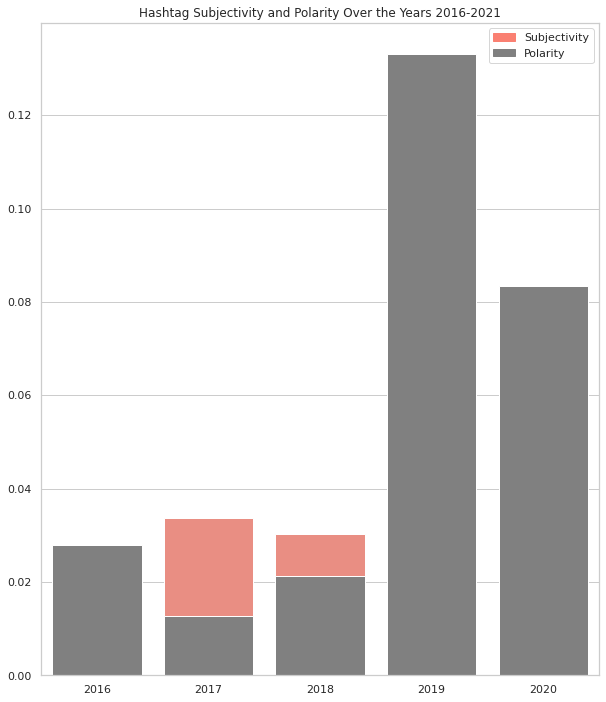

In [97]:
sns.set_theme(style = 'whitegrid')

fig,ax = plt.subplots(1,figsize = (10,12))
sns.barplot(data =user_tag, x = 'Year',y = 'subjectivity',ax=ax,ci = None,color ="salmon")

sns.barplot(data =user_tag, x = 'Year',y = 'polarity',ax=ax,ci = None,color ="gray")

red_patch = mpatches.Patch(color='salmon', label='Subjectivity')
blue_patch = mpatches.Patch(color='gray', label='Polarity')

plt.legend(handles=[red_patch, blue_patch],loc =1)
plt.title ("Hashtag Subjectivity and Polarity Over the Years 2016-2021")
ax.set(ylabel ="",xlabel="")


In [4]:
#hashtag typicality

results = Counter()
df['hashtags'].str.lower().str.split(',').apply(results.update)
results.most_common(30)

[('refugees', 16456),
 ('migranti', 14233),
 ('migrants', 12282),
 ('refugeeswelcome', 11789),
 ('muslimban', 10789),
 ('migration', 8852),
 ('immigration', 7454),
 ('refugee', 4562),
 ('refugiados', 3756),
 ('immigrazione', 3082),
 ('flüchtlinge', 3050),
 ('worldrefugeeday', 3018),
 ('withrefugees', 2845),
 ('eu', 2721),
 ('refugeecrisis', 2656),
 ('trump', 2349),
 ('asylum', 2179),
 ('migranten', 2149),
 ('hostileenvironment', 2046),
 ('brexit', 2045),
 ('immigrati', 2040),
 ('trndnl', 2015),
 ('migrant', 1901),
 ('immigrants', 1793),
 ('réfugiés', 1731),
 ('refugeesgr', 1707),
 ('vluchtelingen', 1672),
 ('greece', 1526),
 ('lesbos', 1512),
 ('rapefugees', 1499)]

In [7]:
def temporal_hashtag_typicality(year,tag):
    
    results_total = Counter()
    results_year = Counter()
    
    df['hashtags'][df['Year']== year].str.lower().str.split(',').apply(results_year.update)
    df['hashtags'].str.lower().str.split(',').apply(results_total.update)
    
    
    freq_total = (results_total[f'{tag}']/sum(results_total.values()))*100
    freq_year = (results_year[f'{tag}']/sum(results_year.values()))*100
    typ =  (freq_year-freq_total)/freq_year
    """ print(f"{year} Counts of all Hashtags : ",freq_year)
    print("Total Counts of all Hashtags: ", freq_total)  
    print(f"Number of posts in {year} with hashtag {tag}:",results_year[f'{tag}'])"""
    return typ


print("Typicality :",temporal_hashtag_typicality(2021,'refugeeswelcome'))

Typicality : 0.03962999251883564


In [5]:
tags = {item: [] for item,val in results.most_common(9)}
tags

{'refugees': [],
 'migranti': [],
 'migrants': [],
 'refugeeswelcome': [],
 'muslimban': [],
 'migration': [],
 'immigration': [],
 'refugee': [],
 'refugiados': []}

In [8]:
for item in tags.keys():
    for years in range(2016,2022):
        tags[item].append((years,temporal_hashtag_typicality(years,item)))       


In [10]:
dummy=pd.DataFrame.from_dict(tags,orient='index').transpose()

def remove_years(x):
        return x[0]
def remove_years1(x):
        return x[1]    

dummy['Years'] = dummy['refugees'].apply(lambda x:remove_years(x)).apply(pd.Series)


for item in tags.keys():
    dummy[f'{item}'] = dummy[f'{item}'].apply(lambda x:remove_years1(x)).apply(pd.Series)


dummy

,refugees,migranti,migrants,refugeeswelcome,muslimban,migration,immigration,refugee,refugiados,Years
0,0.214258,-0.693119,0.159890,0.282763,-242.851707,-0.216771,-0.060064,0.142283,0.380022,2016
1,-0.003530,0.080370,-0.198257,-0.073284,0.644447,-0.050049,-0.060772,-0.053274,-0.024794,2017
2,-0.506107,0.268390,0.029423,-0.422742,-48.144349,0.155916,0.036261,-0.254526,-1.085127,2018
3,-0.318659,0.313093,-0.022782,-0.860115,-44.821079,0.295651,0.218339,0.064391,-1.640298,2019
4,-0.014393,-0.342528,-0.104326,-0.016136,-88.894424,-0.061227,0.058984,-0.140324,-1.347137,2020
5,-0.005419,-0.159466,-0.250664,0.039630,-12.183602,0.278887,-0.138550,0.303184,-3.589638,2021


In [12]:
dummy = dummy.melt("Years", var_name ='hashtags',value_name = 'typicality')
dummy

,Years,hashtags,typicality
0,2016,refugees,0.214258
1,2017,refugees,-0.003530
2,2018,refugees,-0.506107
3,2019,refugees,-0.318659
4,2020,refugees,-0.014393
5,2021,refugees,-0.005419
6,2016,migranti,-0.693119
7,2017,migranti,0.080370
8,2018,migranti,0.268390
9,2019,migranti,0.313093


In [17]:
a, b = 1,0
x, y = dummy.typicality.min(), dummy.typicality.max()
dummy['typicality_norm'] = (dummy.typicality - x) / (y - x) * (b - a) + a
dummy

,Years,hashtags,typicality,typicality_norm
0,2016,refugees,0.214258,0.001767
1,2017,refugees,-0.003530,0.002661
2,2018,refugees,-0.506107,0.004725
3,2019,refugees,-0.318659,0.003955
4,2020,refugees,-0.014393,0.002706
5,2021,refugees,-0.005419,0.002669
6,2016,migranti,-0.693119,0.005493
7,2017,migranti,0.080370,0.002317
8,2018,migranti,0.268390,0.001544
9,2019,migranti,0.313093,0.001361


[Text(0, 0.5, 'typicality')]

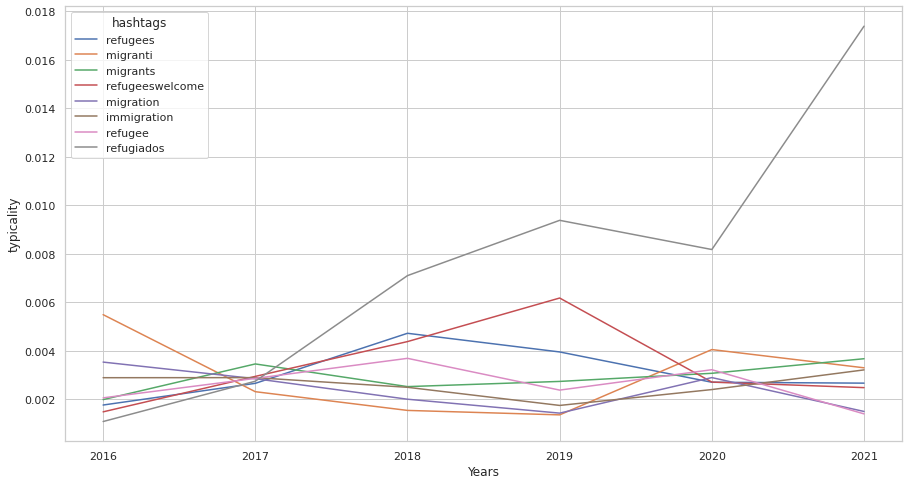

In [25]:
fig,ax = plt.subplots(1,figsize =(15,8))
sns.set_theme(style ='whitegrid')
sns.lineplot(data = dummy[dummy['hashtags'] != 'muslimban'], y ='typicality_norm' , hue ='hashtags', x ="Years",ax =ax)
ax.set(ylabel = "typicality")